In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [2]:
#load data
data = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = data.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)


In [0]:
#Model Build
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (28, 28)),
  tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation = "softmax"),
])

In [0]:
#Model_Compile
model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy", 
              metrics =['accuracy'])

In [5]:
#model_train 
r = model.fit(x_train, 
              y_train, 
              validation_data=(x_test,y_test), 
              epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3577 - accuracy: 0.8959 - val_loss: 0.1628 - val_accuracy: 0.9530
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1876 - accuracy: 0.9443 - val_loss: 0.1262 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1536 - accuracy: 0.9539 - val_loss: 0.1066 - val_accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1326 - accuracy: 0.9599 - val_loss: 0.1031 - val_accuracy: 0.9691
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1169 - accuracy: 0.9640 - val_loss: 0.0997 - val_accuracy: 0.9701
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1071 - accuracy: 0.9667 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0986 - accuracy: 0.9695 - val_loss: 0.0866 - val_accuracy:

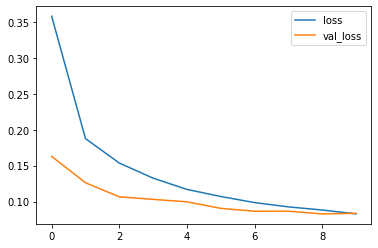

In [6]:
#loss per iteration plot
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

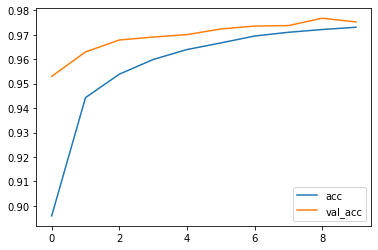

In [7]:
#Accuracy per iteration plot
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Confusion matrix, without Normalisation
[[ 970    0    2    0    0    1    3    1    2    1]
 [   0 1121    3    3    0    0    3    0    5    0]
 [   3    1 1013    1    1    1    1    4    6    1]
 [   1    0    5  982    0    8    0    5    4    5]
 [   1    0    5    0  960    1    4    1    2    8]
 [   2    0    0   10    1  866    5    2    3    3]
 [   6    3    0    1    7    5  934    0    2    0]
 [   3    5   12    2    1    0    0  993    2   10]
 [   6    0    2    5    4    3    2    5  944    3]
 [   2    2    0    6   16    6    0    5    2  970]]


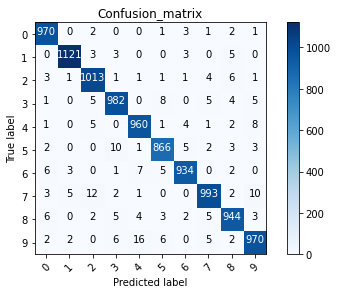

In [13]:
#confusion matrix plotting
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm , classes, normalize = False,
                          title = "Confusion_matrix",
                          cmap = plt.cm.Blues):
  """
  This function prints and pplots the confusion matrix.
  """

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")

  else:
    print("Confusion matrix, without Normalisation")
  print(cm)
  
  plt.imshow(cm, interpolation="nearest", cmap=cmap )
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.0
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), 
             horizontalalignment = 'center',
             color="white" if cm[i,j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Text(0.5, 1.0, 'True label: 8 Predictied: 5')

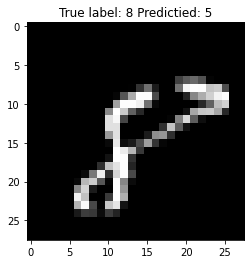

In [28]:
# some misclassified examples
misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
 
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predictied: %s" % (y_test[i], p_test[i]))